# Momentum

    1. The SPY is higher than X days ago, buy
    2. If the SPY is lower than X days ago, sell your long position.
    
    (optimize for number of days)

In [1]:
# use future imports for python 3.x forward compatibility
from __future__ import print_function
from __future__ import unicode_literals
from __future__ import division
from __future__ import absolute_import

# other imports
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

# project imports
import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbol = '^GSPC'
symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
#end = datetime.datetime(2010, 12, 1)
end = datetime.datetime.now()

Define lookback period

In [4]:
TRADING_DAYS_PER_MONTH = 21
TRADING_DAYS_PER_YEAR = 252
periods = range(TRADING_DAYS_PER_MONTH*3, TRADING_DAYS_PER_MONTH*19, TRADING_DAYS_PER_MONTH)
periods = [str(period) for period in periods]

Run Strategy

In [5]:
strategies = pd.Series()
for period in periods:
    print("{0}".format(period), end=" ")
    strategies[period] = strategy.Strategy(symbol, capital, start, end, period=int(period))
    strategies[period].run()
    strategies[period].tlog, strategies[period].dbal = strategies[period].get_logs()
    strategies[period].stats = strategies[period].get_stats()

63 84 105 126 147 168 189 210 231 252 273 294 315 336 357 378 

Summarize results

In [6]:
metrics = ('annual_return_rate',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'avg_points')

df = strategy.summary(strategies, *metrics)
df

,63,84,105,126,147,168,189,210,231,252,273,294,315,336,357,378
annual_return_rate,8.32,8.40,9.19,9.27,9.76,8.97,9.11,9.71,9.43,9.91,10.02,9.23,9.10,10.03,9.94,9.36
max_closed_out_drawdown,-18.18,-27.53,-26.05,-24.19,-20.89,-20.88,-25.47,-20.93,-22.37,-22.38,-21.35,-23.16,-28.63,-23.99,-22.38,-27.35
drawdown_annualized_return,-2.18,-3.28,-2.84,-2.61,-2.14,-2.33,-2.80,-2.16,-2.37,-2.26,-2.13,-2.51,-3.15,-2.39,-2.25,-2.92
drawdown_recovery,-3.54,-3.58,-2.96,-2.89,-0.34,-0.34,-2.12,-1.10,-0.57,-0.57,-2.73,-2.73,-2.73,-0.93,-0.57,-2.73
best_month,15.02,15.44,15.42,15.42,15.43,15.43,17.79,17.79,17.79,17.79,17.79,17.79,17.79,17.79,17.79,17.79
worst_month,-11.22,-12.00,-13.88,-16.28,-16.30,-16.28,-16.29,-16.29,-16.30,-16.30,-16.28,-16.28,-16.28,-16.30,-16.30,-16.27
sharpe_ratio,0.78,0.76,0.81,0.80,0.82,0.76,0.77,0.81,0.78,0.82,0.82,0.76,0.75,0.81,0.81,0.76
sortino_ratio,0.88,0.88,0.92,0.92,0.95,0.88,0.89,0.94,0.91,0.96,0.96,0.89,0.88,0.96,0.95,0.90
monthly_std,2.87,3.03,3.08,3.14,3.15,3.15,3.21,3.21,3.24,3.25,3.22,3.26,3.33,3.31,3.28,3.33
pct_time_in_market,71.25,73.97,76.31,77.85,78.82,78.80,79.82,79.82,81.08,80.50,81.10,80.37,81.66,81.77,81.04,81.67


Bar graphs

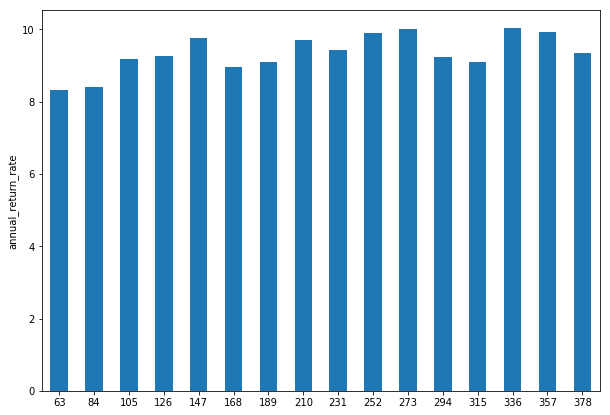

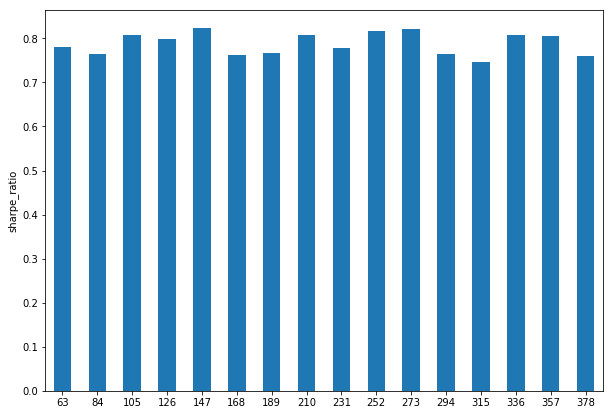

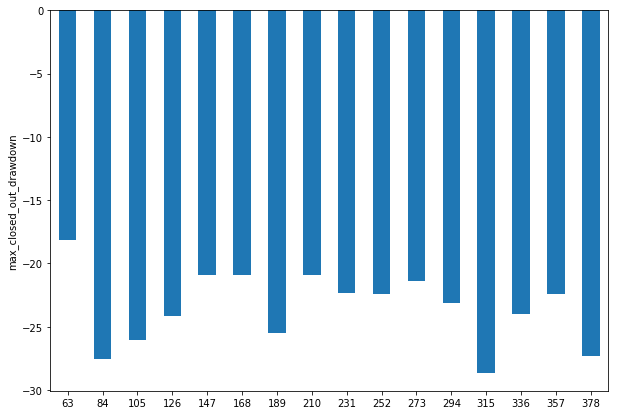

In [7]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [8]:
s = strategies[periods[0]]
benchmark = pf.Benchmark(symbol, capital, s._start, s._end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1995-01-27 00:00:00 BUY  212 SPY @ 47.11
2020-02-14 00:00:00 SELL 212 SPY @ 337.60


Equity curve

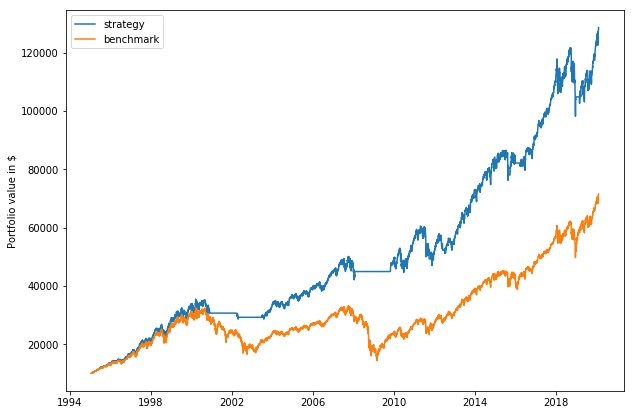

In [9]:
pf.plot_equity_curve(strategies['252'].dbal, benchmark=benchmark.dbal)